In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import sys
import os
import h5py
import glob
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
if '../WatChMaL' not in sys.path:
    sys.path.append('../WatChMaL')

from watchmal.dataset.cnn_mpmt.cnn_mpmt_dataset import CNNmPMTDataset
#from analysis.gan_plot_utils import disp_gan_learn_hist

In [4]:
def channel_to_position(channel):
    channel = channel % 19 
    theta = (channel<12)*2*np.pi*channel/12 + ((channel >= 12) & (channel<18))*2*np.pi*(channel-12)/6
    radius = 0.2*(channel<18)+0.2*(channel<12)
    position = [radius*np.cos(theta), radius*np.sin(theta)] # note this is [y, x] or [row, column]
    return position

## Testing with short tank data

In [5]:
dataset_short = CNNmPMTDataset(h5file='/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_emg_E0to1000MeV_digihits.h5',
                         mpmt_positions_file='/data/WatChMaL/data/IWCDshort_mPMT_image_positions.npz',
                         is_distributed=False)

In [6]:
data_short = dataset_short.__getitem__(8)['data']

In [7]:
print(data_short.shape)

torch.Size([19, 29, 40])


In [50]:

def plot_event(data, mpmt_pos, title, old_convention=False, **plot_args):
    #cmap.set_under(color='black')

    fig = plt.figure(figsize=(20,12))
    ax = fig.add_subplot(111)
    
    #ax = plt.gca()
    
    mpmts = ax.scatter(mpmt_pos[:, 1], mpmt_pos[:, 0], s=380, facecolors='none', edgecolors='0.2')
    indices = np.indices(data.shape)
    channels = indices[0].flatten()
    positions = indices[1:].reshape(2,-1).astype(np.float64)
    positions += channel_to_position(channels)
    
    if old_convention:
        positions[1] = max(mpmt_pos[:, 1])-positions[1]
    
    cmap = copy.copy(plt.cm.jet)
    ax.set_facecolor('black')
    cmap.set_under(color='black')
    
    pmts = ax.scatter(positions[1], positions[0], c=data.flatten(), cmap=cmap, vmin=0.0000001, s=3, **plot_args)
    
    fig.suptitle(title, fontsize=28)
    ax.set_xlabel('Distance CCW on perimeter from x-axis (cm)', fontsize=20)
    ax.set_ylabel('Y (cm)', fontsize=20)
    plt.colorbar(pmts)
    
    plt.tight_layout()


In [9]:
"""
def plot_event(data, mpmt_pos, old_convention=False, title=None, style="default", cmap=plt.cm.jet):
    cmap = copy.copy(cmap)
    if style=="dark_background":
        edgecolors='0.2'
        cmap.set_bad(color='black')
    else:
        edgecolors='0.9'
        cmap.set_bad(color='white')
    data[data==0] = np.nan
    indices = np.indices(data.shape)
    channels = indices[0].flatten()
    positions = indices[1:].reshape(2,-1).astype(np.float64)
    positions += channel_to_position(channels)
    if old_convention:
        positions[1] = max(mpmt_pos[:, 1])-positions[1]
    with plt.style.context(style):
        fig = plt.figure(figsize=(20,12))
        ax = fig.add_subplot(111)
        mpmts = ax.scatter(mpmt_pos[:, 1], mpmt_pos[:, 0], s=380, facecolors='none', edgecolors=edgecolors)
        pmts = ax.scatter(positions[1], positions[0], c=data.flatten(), s=3, cmap=cmap)
        plt.colorbar(pmts)
    if title is not None:
        ax.set_title(title)
"""

In [10]:
# Import test events from h5 file
data_path = "/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_emg_E0to1000MeV_digihits.h5"
data_file = h5py.File(data_path, "r")

print(data_file.keys())

energies   = np.array(data_file['energies'])
angles     = np.array(data_file['angles'])
positions  = np.array(data_file['positions'])
labels     = np.array(data_file['labels'])

<KeysViewHDF5 ['angles', 'energies', 'event_hits_index', 'event_ids', 'hit_charge', 'hit_pmt', 'hit_time', 'labels', 'positions', 'root_files', 'veto', 'veto2']>


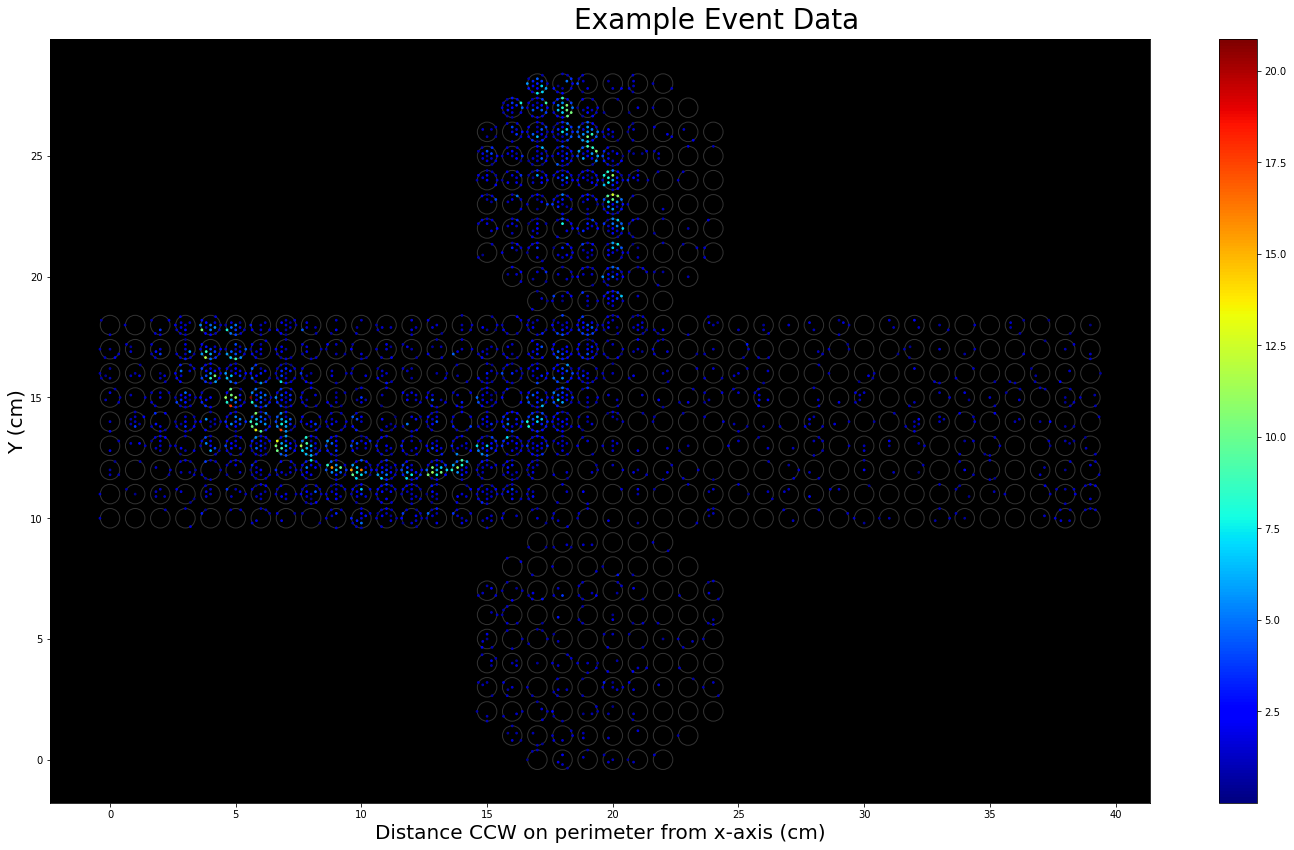

In [51]:
plot_event(data_short,dataset_short.mpmt_positions, 'Example Event Data')

In [13]:
## Long Tank Plotting

In [14]:
dataset_long = CNNmPMTDataset(h5file='/fast_scratch/WatChMaL/data/IWCDmPMT_4pi_full_tank_pointnet.h5',
                         mpmt_positions_file='/data/WatChMaL/data/IWCD_mPMT_image_positions.npz',
                         is_distributed=False)

In [15]:
data_long = dataset_long.__getitem__(8)['data']

In [16]:
print(data_long.shape)

torch.Size([19, 40, 40])


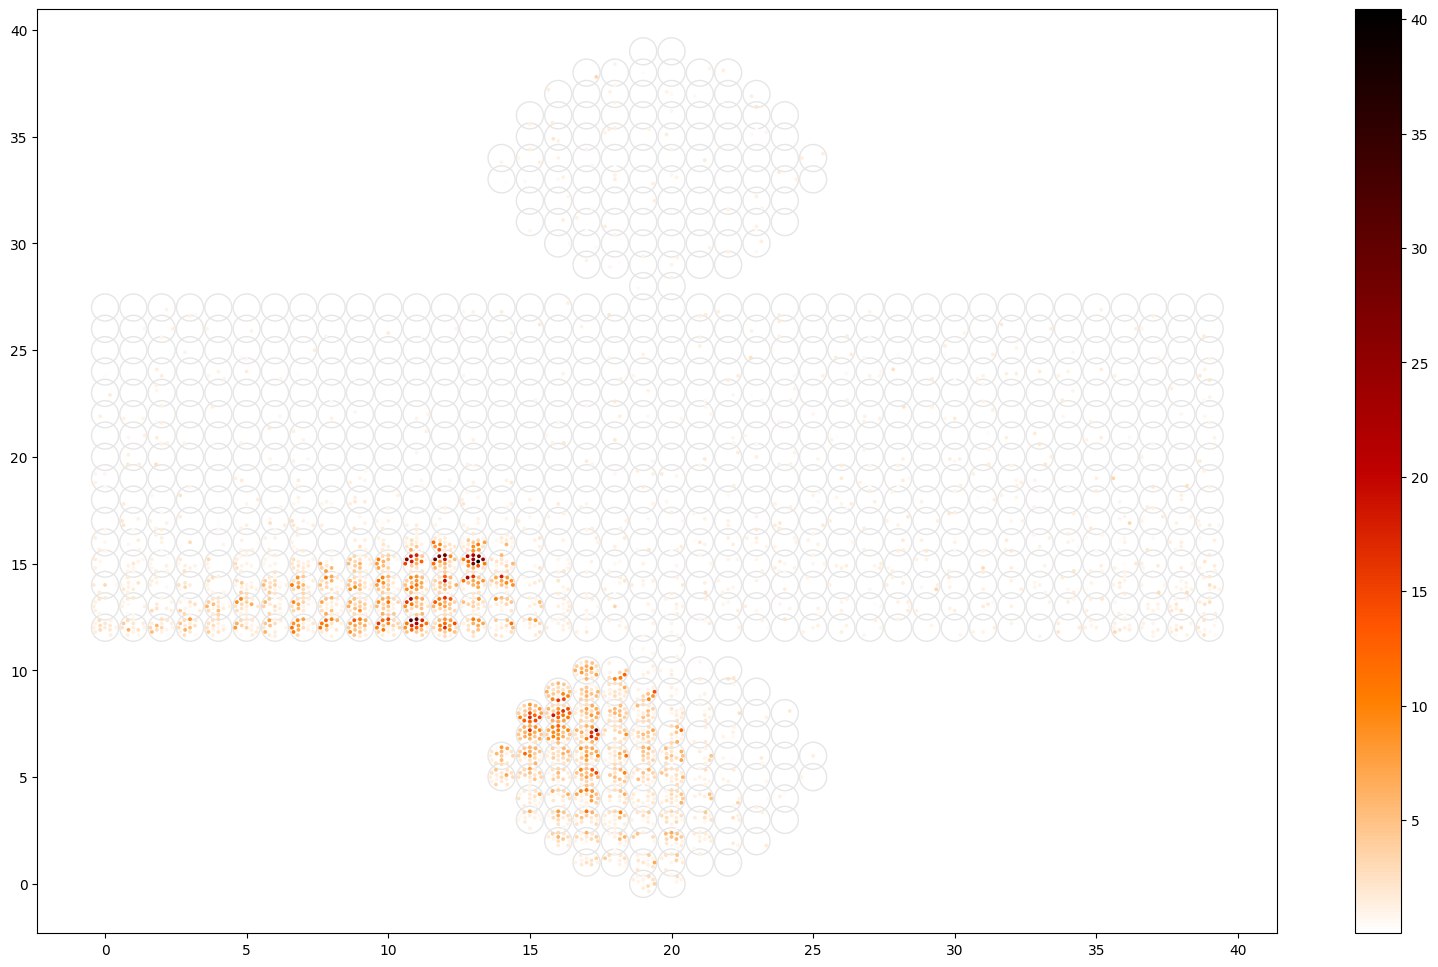

In [17]:
plot_event(data_long, dataset_long.mpmt_positions, cmap=plt.cm.gist_heat_r)

In [18]:
## GAN data loading

In [19]:
path = '/home/jtindall/WatChMaL/outputs/2021-02-28/gan/outputs'

In [20]:
fig = disp_gan_learn_hist(path)

NameError: name 'disp_gan_learn_hist' is not defined

In [ ]:
image_batches = [np.load(fname,allow_pickle=True)['gen_imgs'] for fname in glob.glob(os.path.join(path,'imgs/*'))]
print(len(image_batches))

test_batch = image_batches[-1]
print(test_batch.shape)

test_image = test_batch[5]
print(test_image.shape)

In [ ]:
## GAN event plotting

In [ ]:
print(len(image_batches))
print(len(image_batches[0]))

In [ ]:
#idx = 10
batch_idx = 5
for idx in range(len(test_batch) - 1):
    batch = image_batches[batch_idx]
    image_data = batch[idx]
    
    norm = mcolors.DivergingNorm(vmin=image_data.min(), vmax = image_data.max(), vcenter=0)
    plot_event(image_data, dataset_long.mpmt_positions, cmap=plt.cm.BrBG, norm=norm)

In [ ]:
## GAN data loading

In [ ]:
path = '/home/jtindall/WatChMaL/outputs/2021-03-01/gan_wasserstein/outputs'

In [ ]:
fig = disp_gan_learn_hist(path)

In [ ]:
image_batches = [np.load(fname,allow_pickle=True)['gen_imgs'] for fname in glob.glob(os.path.join(path,'imgs/*'))]
print(len(image_batches))

test_batch = image_batches[-1]
print(test_batch.shape)

test_image = test_batch[5]
print(test_image.shape)

In [ ]:
## GAN event plotting

In [ ]:
print(len(image_batches))
print(len(image_batches[0]))

In [ ]:
#idx = 10
batch_idx = 5
for idx in range(len(test_batch) - 1):
    batch = image_batches[batch_idx]
    image_data = batch[idx]
    
    norm = mcolors.DivergingNorm(vmin=image_data.min(), vmax = image_data.max(), vcenter=0)
    plot_event(image_data, dataset_long.mpmt_positions, cmap=plt.cm.BrBG, norm=norm)